### Script Pruebas

In [5]:
import numpy as np
import pandas as panda
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import math

sns.set_style('whitegrid')
tornado = panda.read_csv("tornados.csv")

tornado = tornado.drop('om', axis=1)
tornado = tornado.drop('tz', axis=1)
tornado = tornado.drop('datetime_utc', axis=1)

le = preprocessing.LabelEncoder()
tornado.st = le.fit_transform(tornado.st)
tornado.fc = le.fit_transform(tornado.fc)

tornado = tornado.dropna(subset=['mag'])

medianValue = tornado.loss.median()
stdValue = math.sqrt(49950)
new_data = np.random.normal(medianValue, stdValue, len(tornado[tornado['loss'].isnull()]))
tornado.loc[tornado['loss'].isnull(), 'loss'] = new_data
tornado.to_csv('tornadosEDA.csv')
tornado


,yr,mo,dy,date,time,st,stf,mag,inj,fat,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,1950,10,1,1950-10-01,21:00:00,36,40,1.0,0,0,...,-102.3000,15.80,10,1,1,25,0,0,0,0
1,1950,10,9,1950-10-09,02:15:00,27,37,3.0,3,0,...,0.0000,2.00,880,1,1,47,0,0,0,0
2,1950,11,20,1950-11-20,02:20:00,17,21,2.0,0,0,...,0.0000,0.10,10,1,1,177,0,0,0,0
3,1950,11,20,1950-11-20,04:00:00,17,21,1.0,0,0,...,0.0000,0.10,10,1,1,209,0,0,0,0
4,1950,11,20,1950-11-20,07:30:00,25,28,1.0,3,0,...,0.0000,2.00,37,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68687,2022,9,28,2022-09-28,03:56:00,9,12,0.0,0,0,...,-80.0680,0.20,50,1,1,99,0,0,0,0
68688,2022,9,28,2022-09-28,13:32:00,9,12,0.0,0,0,...,-80.8841,3.00,100,1,1,9,0,0,0,0
68689,2022,9,30,2022-09-30,10:25:00,27,37,0.0,0,0,...,-78.3011,0.74,20,1,1,19,0,0,0,0
68691,2022,9,4,2022-09-04,15:44:00,35,39,0.0,0,0,...,-80.6555,0.07,15,1,1,99,0,0,0,0


In [87]:
import numpy as np
import pandas as panda
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('whitegrid')
tornado = panda.read_csv("tornados.csv")


### Head()

In [88]:
tornado.head()

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3,15.8,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0,2.0,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0,0.1,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0,0.1,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0,2.0,37,1,1,101,0,0,0,False


### Tail()

In [89]:
tornado.tail()

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
68688,621922,2022,9,28,2022-09-28,13:32:00,America/Chicago,2022-09-28T18:32:00Z,FL,12,...,-80.8841,3.00,100,1,1,9,0,0,0,False
68689,621923,2022,9,30,2022-09-30,10:25:00,America/Chicago,2022-09-30T15:25:00Z,NC,37,...,-78.3011,0.74,20,1,1,19,0,0,0,False
68690,621924,2022,9,30,2022-09-30,13:22:00,America/Chicago,2022-09-30T18:22:00Z,NC,37,...,-76.7147,0.70,12,1,1,13,0,0,0,False
68691,621900,2022,9,4,2022-09-04,15:44:00,America/Chicago,2022-09-04T20:44:00Z,OH,39,...,-80.6555,0.07,15,1,1,99,0,0,0,False
68692,621901,2022,9,9,2022-09-09,23:21:00,America/Chicago,2022-09-10T04:21:00Z,SC,45,...,-79.7537,0.68,125,1,1,19,0,0,0,False


### Describe()

In [90]:
tornado.describe()

,om,yr,mo,dy,stf,mag,inj,fat,loss,slat,...,elat,elon,len,wid,ns,sn,f1,f2,f3,f4
count,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,67937.000000,68693.000000,68693.00000,4.152300e+04,68693.000000,...,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000
mean,113201.815542,1991.854061,5.968541,15.930881,29.220255,0.778721,1.418689,0.08931,2.020898e+06,37.129386,...,22.960651,-56.836090,3.489270,107.767633,1.008764,0.991411,104.643952,8.605142,1.687202,0.506791
std,226621.993899,19.565158,2.444656,8.750070,15.013273,0.895790,18.114752,1.47212,3.039588e+07,5.099005,...,18.528144,45.340732,8.247115,206.851267,0.095060,0.092278,96.750296,38.106019,16.681665,9.163194
min,1.000000,1950.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,5.000000e+01,17.721200,...,0.000000,-163.530000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,1976.000000,4.000000,8.000000,18.000000,0.000000,0.000000,0.00000,1.000000e+04,33.180000,...,0.000000,-94.780000,0.120000,20.000000,1.000000,1.000000,37.000000,0.000000,0.000000,0.000000
50%,588.000000,1995.000000,6.000000,16.000000,28.000000,1.000000,0.000000,0.00000,5.000000e+04,37.000000,...,32.550000,-84.720000,0.800000,50.000000,1.000000,1.000000,85.000000,0.000000,0.000000,0.000000
75%,1118.000000,2008.000000,7.000000,24.000000,42.000000,1.000000,0.000000,0.00000,5.000000e+05,40.920000,...,38.650000,0.000000,3.210000,100.000000,1.000000,1.000000,137.000000,0.000000,0.000000,0.000000
max,622080.000000,2022.000000,12.000000,31.000000,78.000000,5.000000,1740.000000,158.00000,2.800100e+09,61.020000,...,61.020000,0.000000,234.700000,4576.000000,3.000000,1.000000,810.000000,820.000000,710.000000,507.000000


### Info()

In [91]:
tornado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

### Shape()

In [92]:
tornado.shape

(68693, 27)

### Eliminamos columnas que no son necesarias (ID del tornado y Zona horaria)

In [93]:
tornado = tornado.drop('om', axis=1)
tornado = tornado.drop('tz', axis=1)
tornado = tornado.drop('datetime_utc', axis=1)
tornado

,yr,mo,dy,date,time,st,stf,mag,inj,fat,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,1950,10,1,1950-10-01,21:00:00,OK,40,1.0,0,0,...,-102.3000,15.80,10,1,1,25,0,0,0,False
1,1950,10,9,1950-10-09,02:15:00,NC,37,3.0,3,0,...,0.0000,2.00,880,1,1,47,0,0,0,False
2,1950,11,20,1950-11-20,02:20:00,KY,21,2.0,0,0,...,0.0000,0.10,10,1,1,177,0,0,0,False
3,1950,11,20,1950-11-20,04:00:00,KY,21,1.0,0,0,...,0.0000,0.10,10,1,1,209,0,0,0,False
4,1950,11,20,1950-11-20,07:30:00,MS,28,1.0,3,0,...,0.0000,2.00,37,1,1,101,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68688,2022,9,28,2022-09-28,13:32:00,FL,12,0.0,0,0,...,-80.8841,3.00,100,1,1,9,0,0,0,False
68689,2022,9,30,2022-09-30,10:25:00,NC,37,0.0,0,0,...,-78.3011,0.74,20,1,1,19,0,0,0,False
68690,2022,9,30,2022-09-30,13:22:00,NC,37,NaN,0,0,...,-76.7147,0.70,12,1,1,13,0,0,0,False
68691,2022,9,4,2022-09-04,15:44:00,OH,39,0.0,0,0,...,-80.6555,0.07,15,1,1,99,0,0,0,False


### Realizamos LabelEncoder a la columna 'st', ya que tiene letras escritas de las poblacions donde han ocurrido los tornados

In [94]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
tornado.st = le.fit_transform(tornado.st)
tornado.fc = le.fit_transform(tornado.fc)
tornado

,yr,mo,dy,date,time,st,stf,mag,inj,fat,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,1950,10,1,1950-10-01,21:00:00,36,40,1.0,0,0,...,-102.3000,15.80,10,1,1,25,0,0,0,0
1,1950,10,9,1950-10-09,02:15:00,27,37,3.0,3,0,...,0.0000,2.00,880,1,1,47,0,0,0,0
2,1950,11,20,1950-11-20,02:20:00,17,21,2.0,0,0,...,0.0000,0.10,10,1,1,177,0,0,0,0
3,1950,11,20,1950-11-20,04:00:00,17,21,1.0,0,0,...,0.0000,0.10,10,1,1,209,0,0,0,0
4,1950,11,20,1950-11-20,07:30:00,25,28,1.0,3,0,...,0.0000,2.00,37,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68688,2022,9,28,2022-09-28,13:32:00,9,12,0.0,0,0,...,-80.8841,3.00,100,1,1,9,0,0,0,0
68689,2022,9,30,2022-09-30,10:25:00,27,37,0.0,0,0,...,-78.3011,0.74,20,1,1,19,0,0,0,0
68690,2022,9,30,2022-09-30,13:22:00,27,37,NaN,0,0,...,-76.7147,0.70,12,1,1,13,0,0,0,0
68691,2022,9,4,2022-09-04,15:44:00,35,39,0.0,0,0,...,-80.6555,0.07,15,1,1,99,0,0,0,0


### Mostramos los tornados de cada año para comprobar la distribución y pensar si hay que hacer binarización

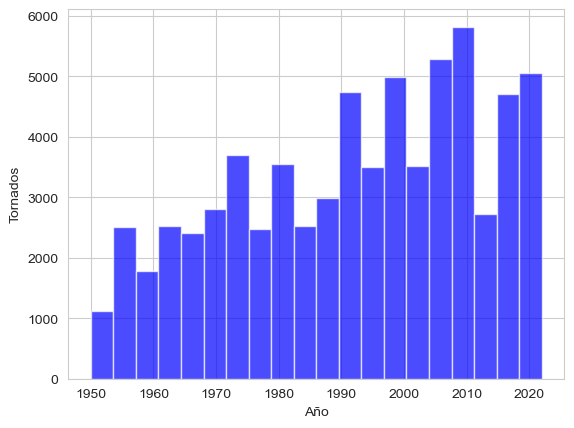

In [95]:
plt.hist(tornado.yr, bins=20, color='blue', alpha=0.7)
plt.xlabel('Año')
plt.ylabel('Tornados')
plt.show()

### Realizar binarización de 4 bins para intentar que la varianza sea estable

In [96]:
bins = panda.qcut(tornado.yr, q=4, labels=False)
bins


0        0
1        0
2        0
3        0
4        0
        ..
68688    3
68689    3
68690    3
68691    3
68692    3
Name: yr, Length: 68693, dtype: int64

In [97]:
bins = panda.qcut(tornado.yr, q=4)
bins

0        (1949.999, 1976.0]
1        (1949.999, 1976.0]
2        (1949.999, 1976.0]
3        (1949.999, 1976.0]
4        (1949.999, 1976.0]
                ...        
68688      (2008.0, 2022.0]
68689      (2008.0, 2022.0]
68690      (2008.0, 2022.0]
68691      (2008.0, 2022.0]
68692      (2008.0, 2022.0]
Name: yr, Length: 68693, dtype: category
Categories (4, interval[float64, right]): [(1949.999, 1976.0] < (1976.0, 1995.0] < (1995.0, 2008.0] < (2008.0, 2022.0]]

### Muestro los bins, pero los años no aparecen de forma correcta

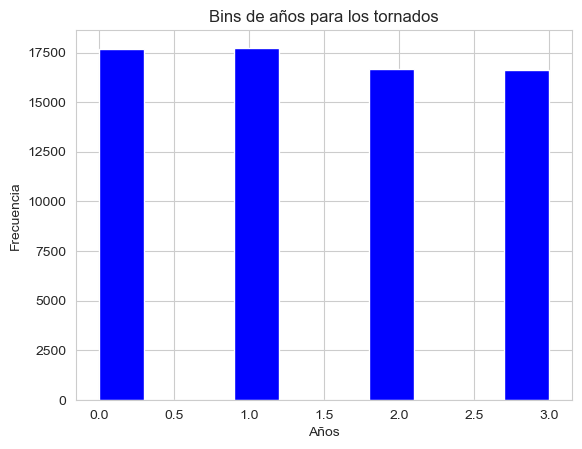

In [98]:
plt.hist(panda.qcut(tornado.yr, q=4, labels=False), color='blue')
plt.title('Bins de años para los tornados')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.show()

### Guardo los años en una variable

In [99]:
years = bins.value_counts().index
years

CategoricalIndex([(1976.0, 1995.0], (1949.999, 1976.0], (1995.0, 2008.0],
                  (2008.0, 2022.0]],
                 categories=[(1949.999, 1976.0], (1976.0, 1995.0], (1995.0, 2008.0], (2008.0, 2022.0]], ordered=True, dtype='category', name='yr')

### Muestro el gráfico cargando los años sacados anteriormente

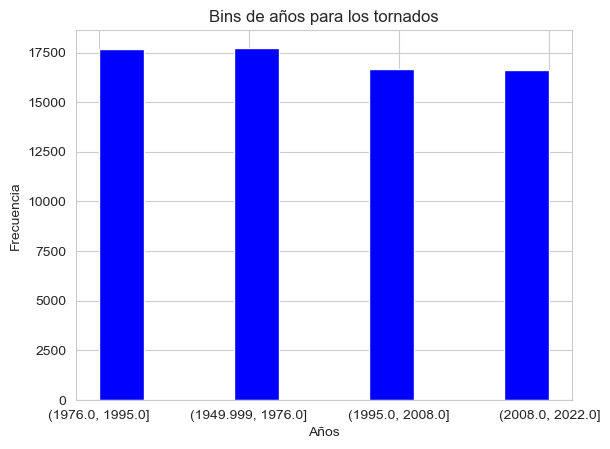

In [100]:
plt.hist(panda.qcut(tornado.yr, q=4, labels=False), color='blue')
plt.title('Bins de años para los tornados')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.xticks(range(4), years)
plt.show()

### Comprobamos columnas nulas

In [101]:
tornado.isnull().sum()

yr          0
mo          0
dy          0
date        0
time        0
st          0
stf         0
mag       756
inj         0
fat         0
loss    27170
slat        0
slon        0
elat        0
elon        0
len         0
wid         0
ns          0
sn          0
f1          0
f2          0
f3          0
f4          0
fc          0
dtype: int64

### Calculamos media de la columna mag

In [102]:
mag = tornado.mag.mean()
print("Esto es media de mag", mag)
magNotNulls = tornado.mag.mean(skipna=True)
print("Esto es media de mag sin nulls", magNotNulls)

Esto es media de mag 0.778721462531463
Esto es media de mag sin nulls 0.778721462531463


**Como la media es la misma contando con los nulos o no, no voy a corregir la columna con valores aleatorios, elimino las filas que no tienen magnitud**

In [103]:
tornado = tornado.dropna(subset=['mag'])
tornado

,yr,mo,dy,date,time,st,stf,mag,inj,fat,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,1950,10,1,1950-10-01,21:00:00,36,40,1.0,0,0,...,-102.3000,15.80,10,1,1,25,0,0,0,0
1,1950,10,9,1950-10-09,02:15:00,27,37,3.0,3,0,...,0.0000,2.00,880,1,1,47,0,0,0,0
2,1950,11,20,1950-11-20,02:20:00,17,21,2.0,0,0,...,0.0000,0.10,10,1,1,177,0,0,0,0
3,1950,11,20,1950-11-20,04:00:00,17,21,1.0,0,0,...,0.0000,0.10,10,1,1,209,0,0,0,0
4,1950,11,20,1950-11-20,07:30:00,25,28,1.0,3,0,...,0.0000,2.00,37,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68687,2022,9,28,2022-09-28,03:56:00,9,12,0.0,0,0,...,-80.0680,0.20,50,1,1,99,0,0,0,0
68688,2022,9,28,2022-09-28,13:32:00,9,12,0.0,0,0,...,-80.8841,3.00,100,1,1,9,0,0,0,0
68689,2022,9,30,2022-09-30,10:25:00,27,37,0.0,0,0,...,-78.3011,0.74,20,1,1,19,0,0,0,0
68691,2022,9,4,2022-09-04,15:44:00,35,39,0.0,0,0,...,-80.6555,0.07,15,1,1,99,0,0,0,0


**La columna de loss si que es relevante, por lo que voy a calcular la media y rellenarla con un random**

In [104]:
print("Media de loss:", tornado.loss.median())
print("Minimo de loss:", tornado.loss.min())
print("Maximo de loss:", tornado.loss.max())
print("La desviación típica es:", tornado.loss.std())

Media de loss: 50000.0
Minimo de loss: 50.0
Maximo de loss: 2800100000.0
La desviación típica es: 30398068.79856513


**Guardo en la columna loss números randoms a partir de la desciación típica**

In [105]:
import math

medianValue = tornado.loss.median()
stdValue = math.sqrt(49950)
new_data = np.random.normal(medianValue, stdValue, len(tornado[tornado['loss'].isnull()]))
tornado.loc[tornado['loss'].isnull(), 'loss'] = new_data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxscaler = MinMaxScaler()
train[["Fare"]] = minMaxscaler.fit_transform(train[["Fare"]])
train[["Age"]] = minMaxscaler.fit_transform(train[["Age"]])
train.head(10)

### Mostramos cantidad de tornados para cada una de sus magnitudes

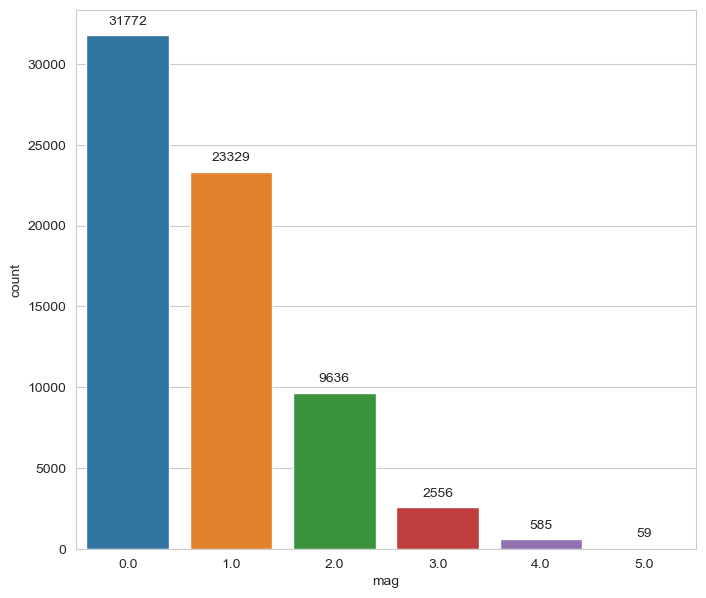

In [106]:
plt.figure(figsize=(8, 7))
ax = sns.countplot(x='mag', data=tornado)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Muestro relación entre magnitud y fallecimientos

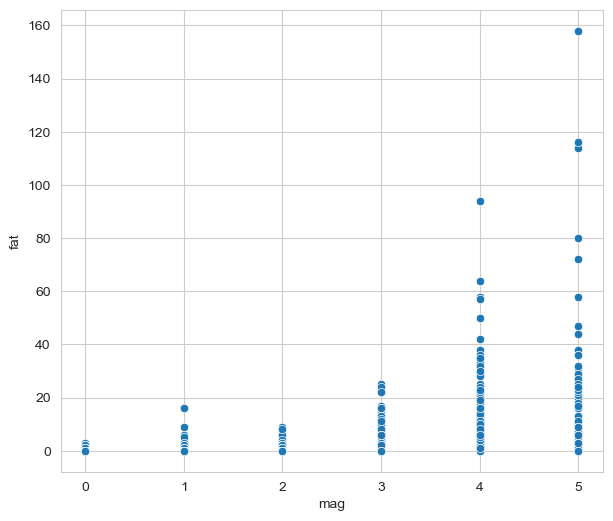

In [107]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x='mag', y='fat', data=tornado)
plt.show()

### Muestro relación entre pérdidas y magnitud

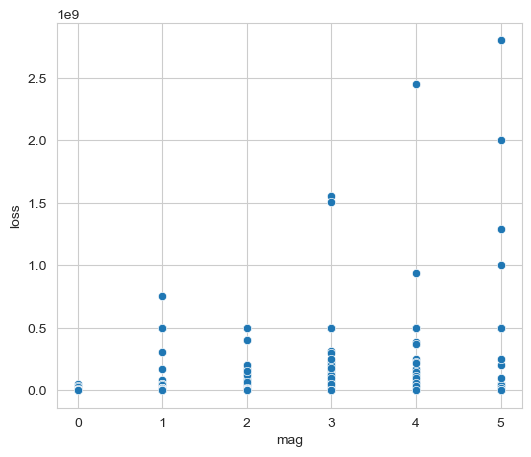

In [108]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='mag', y='loss', data=tornado)
plt.show()

In [109]:
tornado[tornado.loss>1000000000]

,yr,mo,dy,date,time,st,stf,mag,inj,fat,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
55272,2011,4,27,2011-04-27,14:05:00,1,1,5.0,145,72,...,-86.1511,132.00,2200,2,0,0,0,0,0,0
55288,2011,4,27,2011-04-27,15:43:00,1,1,4.0,1500,64,...,-86.7436,80.68,2600,1,1,63,125,73,0,0
55592,2011,5,22,2011-05-22,16:34:00,24,29,5.0,1150,158,...,-94.2213,21.62,1600,1,1,145,97,145,0,0
57584,2013,5,20,2013-05-20,13:56:00,36,40,5.0,212,24,...,-97.3999,13.85,1900,1,1,87,27,0,0,0
63647,2019,10,20,2019-10-20,19:58:00,44,48,3.0,0,0,...,-96.6833,15.76,1300,1,1,113,0,0,0,0
65427,2020,3,3,2020-03-03,00:32:00,43,47,3.0,220,5,...,-85.8904,60.13,1600,1,1,37,189,159,0,0


**Como solo hay 6 tornados, los considero como raros y los elimino para que no afecten al modelo**

In [110]:
tornado = tornado[tornado['loss'] <= 1000000000]

**Muestro de nuevo el gráfico**

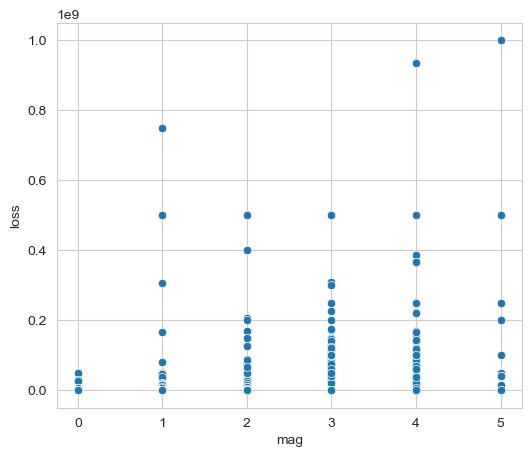

In [111]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='mag', y='loss', data=tornado)
plt.show()

### Cambio tipo de los datos en las fechas

In [112]:
tornado['date'] = panda.to_datetime(tornado['date'])
tornado['time'] = panda.to_datetime(tornado['time'], format='%H:%M:%S')

/var/folders/2w/nrlccrds5mqc9d06qhj5hwkw0000gn/T/ipykernel_1114/428320386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tornado['date'] = panda.to_datetime(tornado['date'])
/var/folders/2w/nrlccrds5mqc9d06qhj5hwkw0000gn/T/ipykernel_1114/428320386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tornado['time'] = panda.to_datetime(tornado['time'], format='%H:%M:%S')


### Muestro escalado

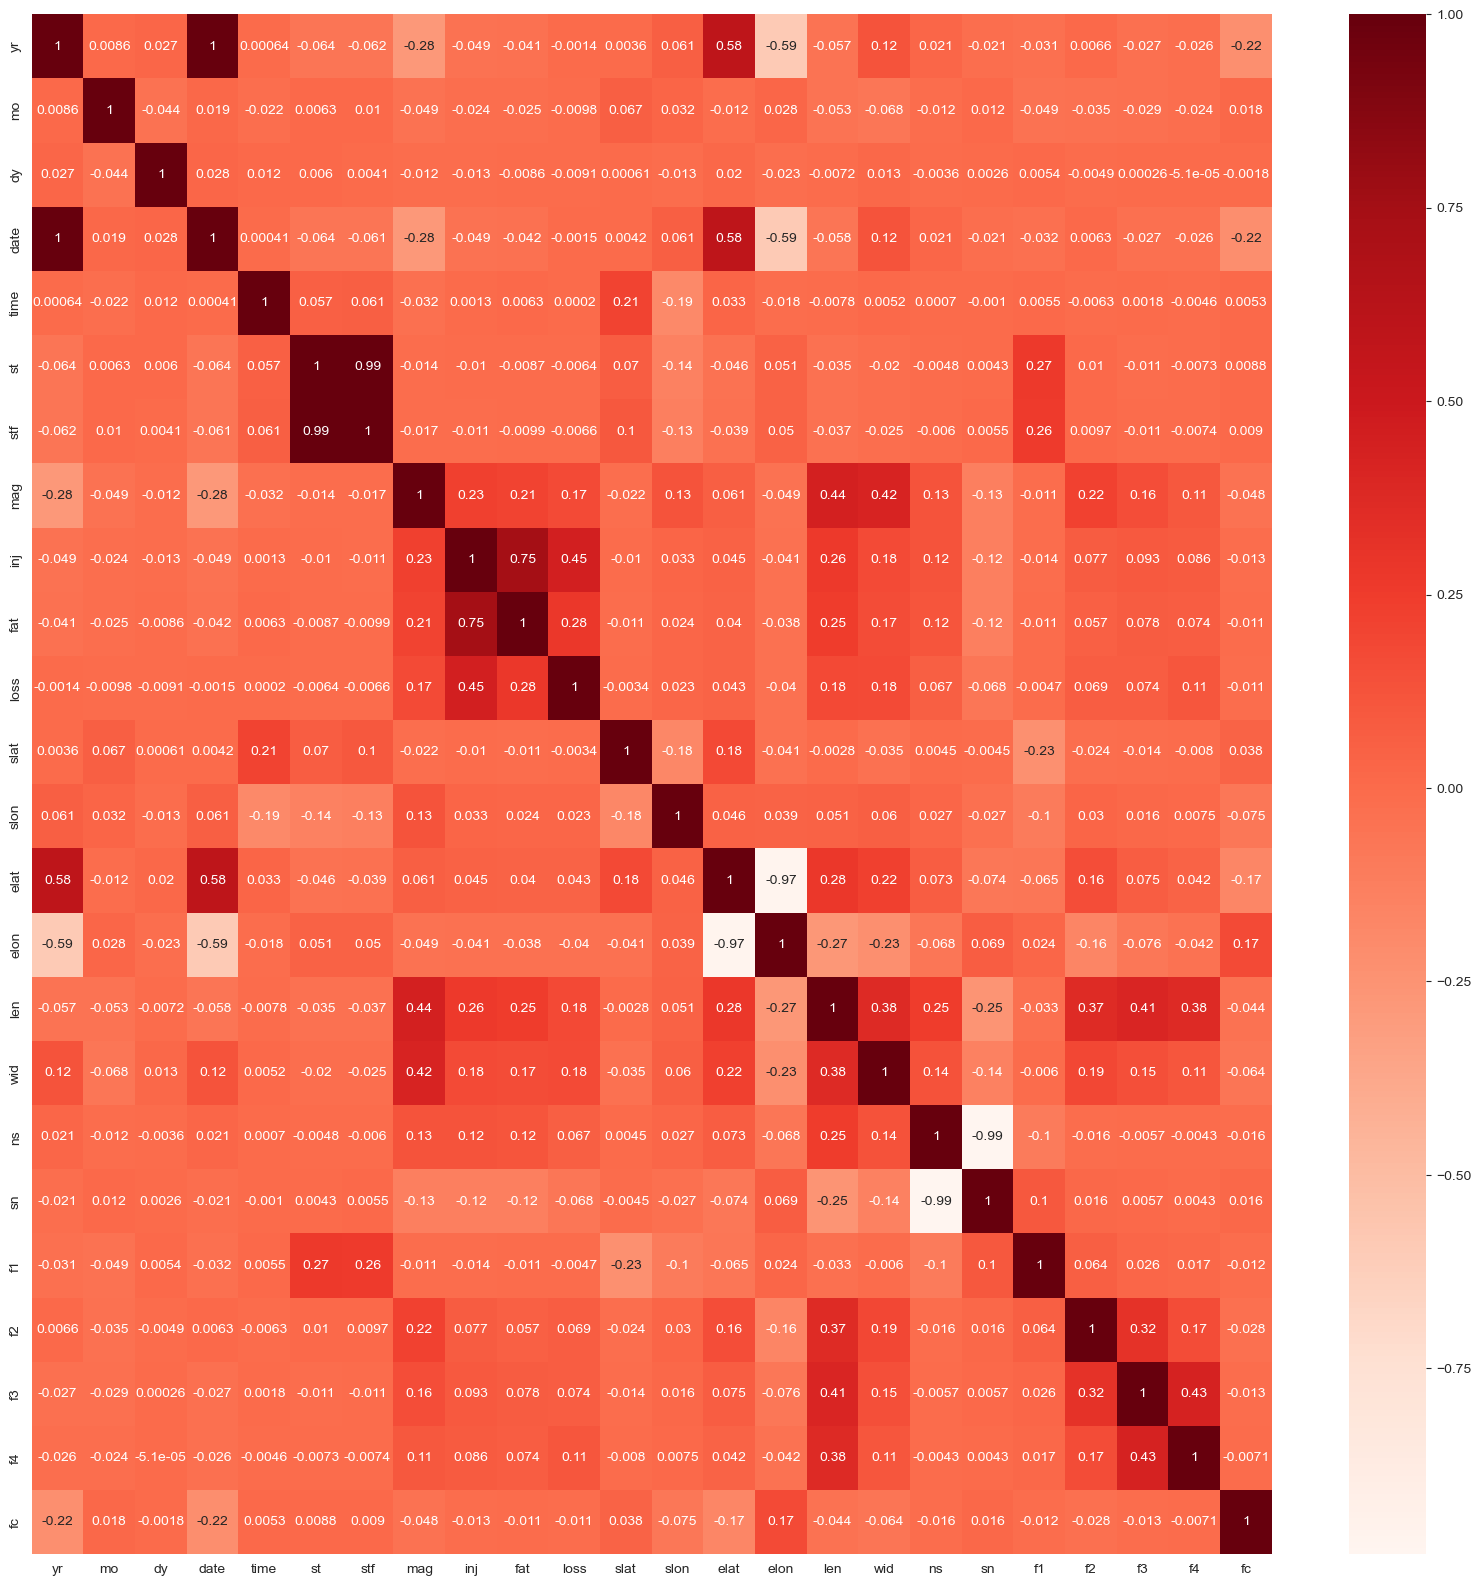

In [113]:
plt.figure(figsize=(20,20))
cor = tornado.corr() #Por defecto calculamos el de Pearson, para calcular Spearman -> df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()